# ***Predicting heart disease using machine learning***

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease on their medical attributes

Approach
1. Problem Deifiniton
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameeters abouta patient, can we predict whether or not they have heart disease?

## 2.Data
From Cleveland UCI Machine learning Repository

Kaggle link : https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci

## 3.Evaluation
> 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept

## 4. Features

**Create a data dictionary**
1. Age
2. Sex : (1=male; 0=female)
3. chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic

4. resting blood pressure (in mm Hg on admission to the hospital)

5. serum cholestoral in mg/dl

6. (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved

9. exercise induced angina (1 = yes; 0 = no)

10.  Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.It may feel like pressure or squeezing in your chest.

11. oldpeak = ST depression induced by exercise relative to rest

12. slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping

13. vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy

14. A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

* Target : (0 = No Heart disease; 1 = Heart disease)

## **Preparing the tools**

1. Pandas
2. NumPy
3. Matplotlib

In [195]:
# Importing all the tools needed

# Regular EDA (exploratory data ) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

# **Load Data**

In [196]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Exploration (exploratory data analysis or EDA)
1. What trying to solve?
2. Kind of Data
3. Missig data
4. Outliers
5. Add, chane or remove features

In [197]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [198]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

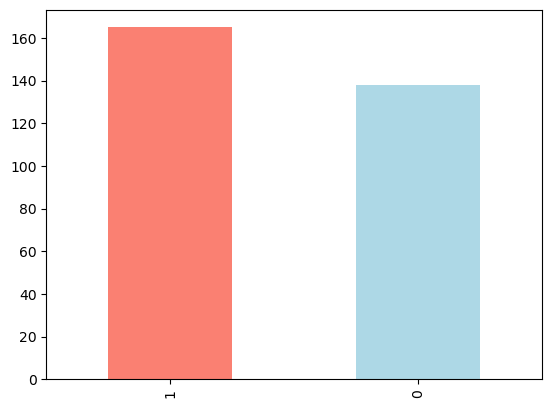

In [199]:
df.target.value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [201]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart disease frequency according to sex

In [202]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [203]:
# Compare target column with sex columns
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


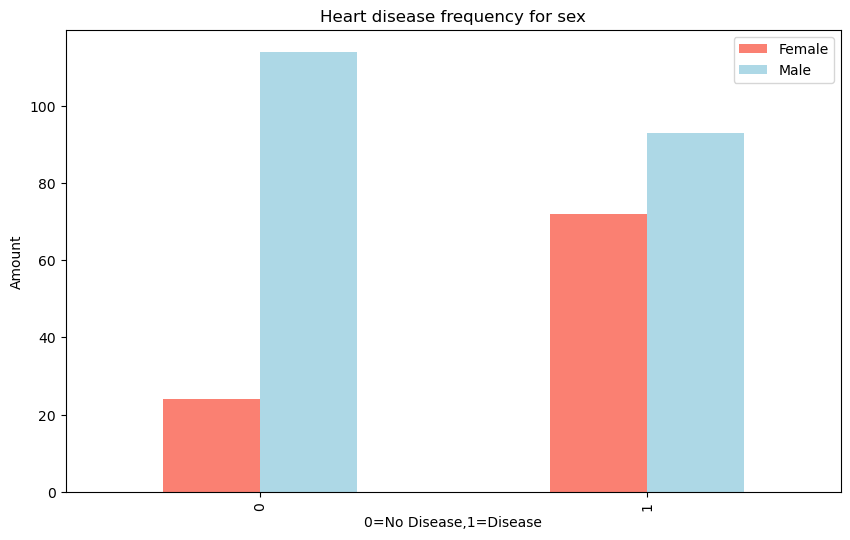

In [204]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue']);
plt.title('Heart disease frequency for sex')
plt.xlabel('0=No Disease,1=Disease')
plt.ylabel("Amount")
plt.legend(['Female','Male'])

In [205]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [206]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

# **Age vs Max Heart Rate**

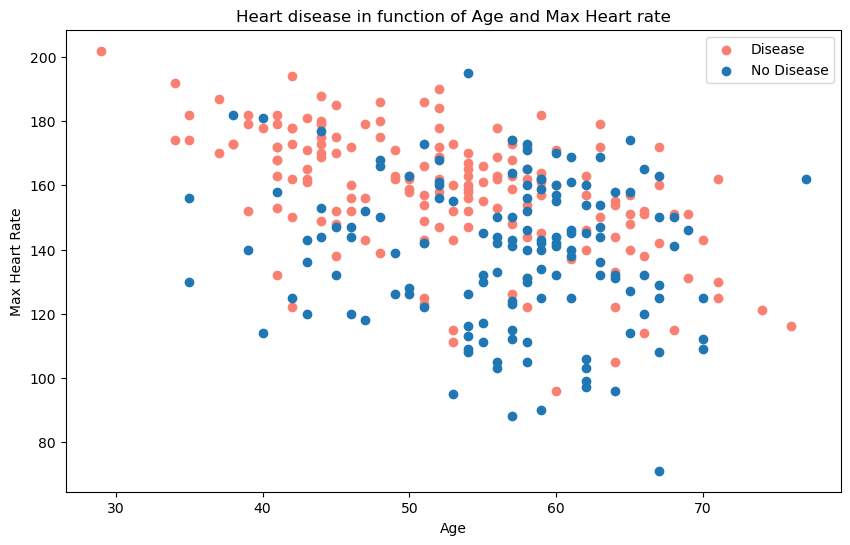

In [207]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon');

plt.scatter(df.age[df.target==0],df.thalach[df.target==0]);

plt.title("Heart disease in function of Age and Max Heart rate")
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);

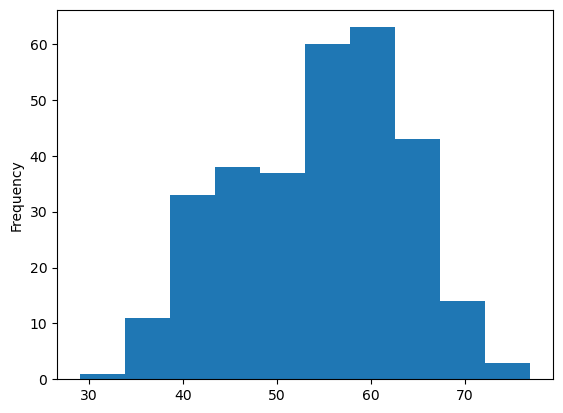

In [208]:
# distribution of age column with a histogram
df.age.plot.hist();

**Heart Disease frequency per Chest Pain Type**

In [209]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


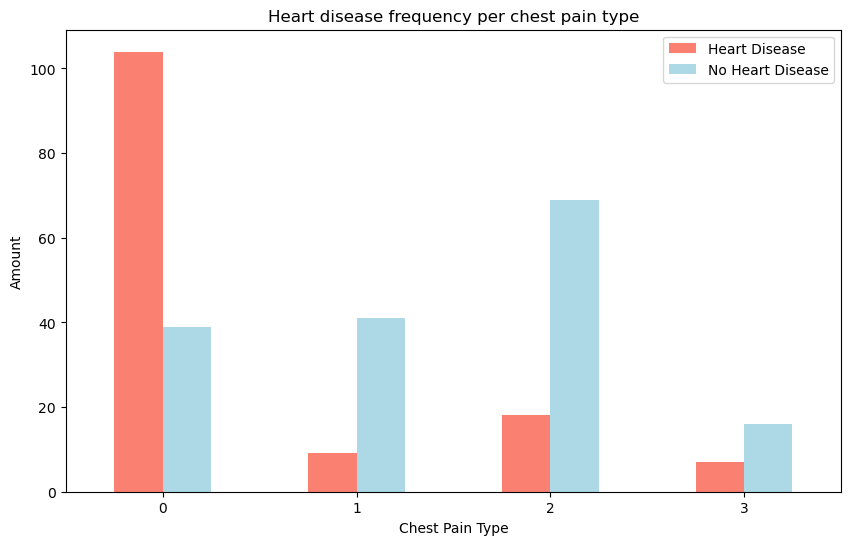

In [210]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
plt.title('Heart disease frequency per chest pain type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['Heart Disease','No Heart Disease']);
plt.xticks(rotation=1);

In [211]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [212]:
# Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


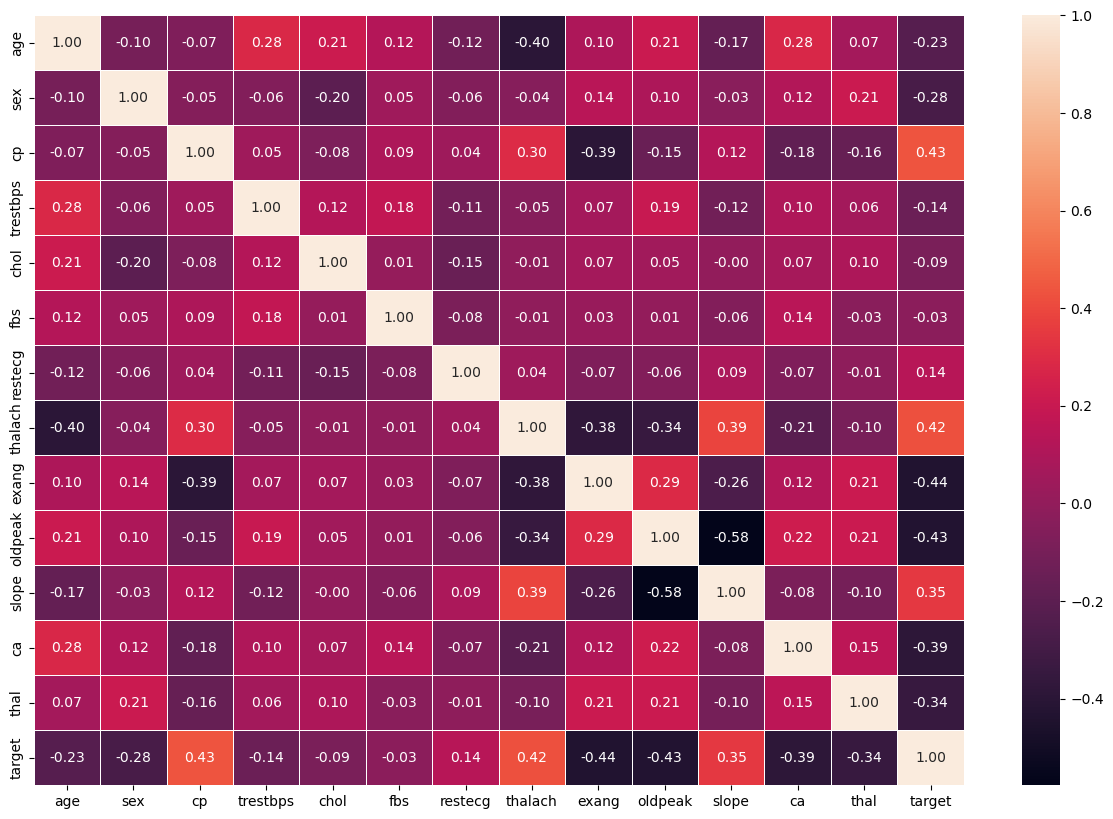

In [213]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt=".2f");
bottom , top = ax.get_ylim()

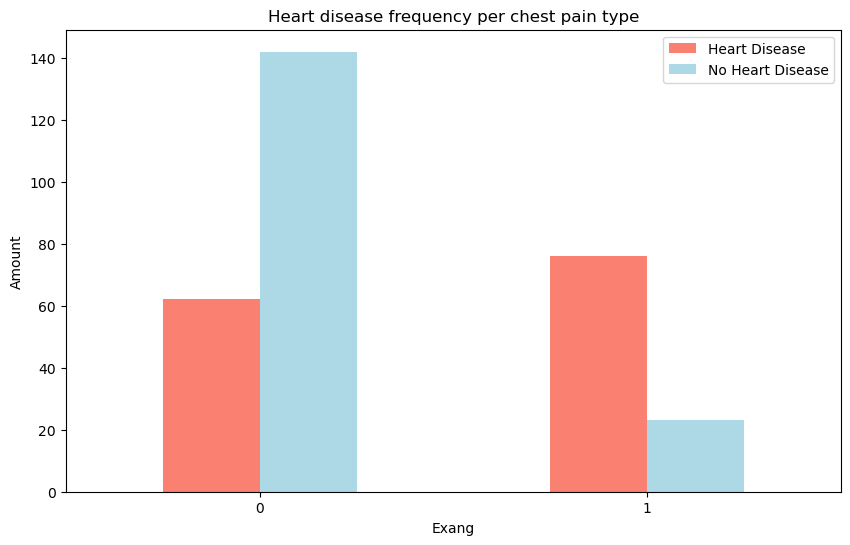

In [214]:
pd.crosstab(df.exang,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
plt.title('Heart disease frequency per chest pain type')
plt.xlabel('Exang')
plt.ylabel('Amount')
plt.legend(['Heart Disease','No Heart Disease']);
plt.xticks(rotation=1);

# ***5. Modelling***

In [215]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [216]:
# Splitting the data into independent and dependent variables
X = df.drop('target',axis=1)
y = df.target

In [217]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [218]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [219]:
# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [220]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2


In [221]:
y_train

95     1
59     1
220    0
242    0
246    0
      ..
86     1
71     1
256    0
161    1
193    0
Name: target, Length: 242, dtype: int64

In [222]:
# Put Models in a dictionary
models = {'Logistic Regression':LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'Random Forest':RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine models.
    models: a dict of different Scikit-Learn machine learning models
    '''

    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)*100
    
    return model_scores


In [223]:
model_score = fit_and_score(models,X_train,X_test,y_train,y_test);
model_score

c:\Users\Dell\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 88.52459016393442,
 'KNN': 63.934426229508205,
 'Random Forest': 85.24590163934425}

**Model Comparison**

<Axes: >

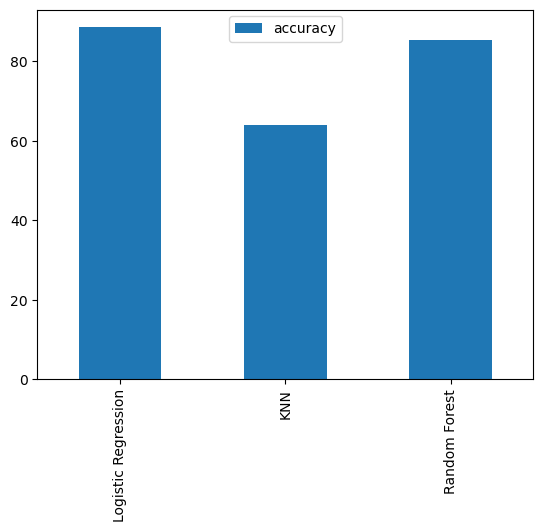

In [224]:
model_comparison = pd.DataFrame(model_score,index=['accuracy'])
model_comparison.T.plot.bar()

* Hyper parameter tuning
* Feature importance
* Confusion confusion_matrix
* precision_score
* Recall
* F1 score
* Classification report
* ROC curve
* Area under curve (AUC)

# **Hyperparameter Tuning**

In [225]:
train_scores = []
test_scores = []

# List of different values for N neighbors
neighbors = list(range(1, 21))

# Setup KNN instance
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)

    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))

    test_scores.append(knn.score(X_test,y_test))


In [226]:
train_scores

[1.0,
 0.7768595041322314,
 0.743801652892562,
 0.7479338842975206,
 0.7644628099173554,
 0.756198347107438,
 0.7479338842975206,
 0.71900826446281,
 0.756198347107438,
 0.7066115702479339,
 0.7066115702479339,
 0.6983471074380165,
 0.7107438016528925,
 0.6900826446280992,
 0.6983471074380165,
 0.6942148760330579,
 0.6694214876033058,
 0.6983471074380165,
 0.6818181818181818,
 0.6859504132231405]

In [227]:
test_scores

[0.6721311475409836,
 0.6229508196721312,
 0.7377049180327869,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6885245901639344,
 0.6229508196721312,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7540983606557377,
 0.7049180327868853,
 0.7213114754098361]

Maximum KNN score on the test data: 75.41%


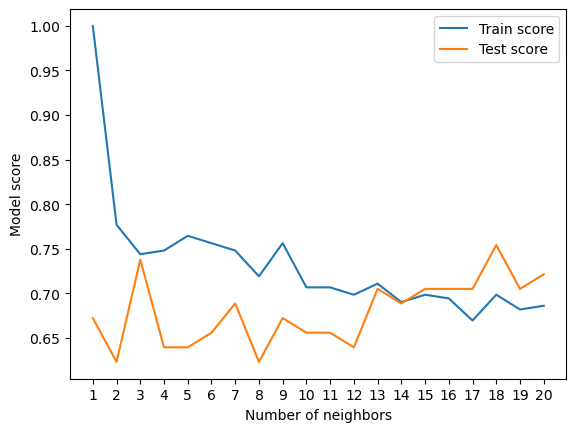

In [228]:
plt.plot(neighbors,train_scores,label='Train score')
plt.plot(neighbors, test_scores,label='Test score')

plt.xticks(np.arange(1,21))
plt.xlabel("Number of neighbors")
plt.ylabel('Model score')
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

**Hyper parameter tuning with RadnomizedSearchCV**

* LogisticRegression()
* RandomForestClassifier()

Using RandomizedSearchCV

In [229]:
# Hyperparameter grid for Logistic Regression
log_reg_grid = {"C":np.logspace(-4,4,20),"solver":['liblinear']}

rf_grid = {'n_estimators':np.arange(10,100,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [230]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegressio
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [231]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [232]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [233]:
# Tune RandomForestClassifier
np.random.seed(42)

rs_random_classifier = RandomizedSearchCV(RandomForestClassifier(),
                                          param_distributions=rf_grid,
                                          cv=5,verbose=True,
                                          n_iter=20)

rs_random_classifier.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [234]:
rs_random_classifier.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_depth': None}

In [235]:
rs_random_classifier.score(X_test,y_test)

0.8852459016393442

# Hyperparamter tuning using GridSearchCV

LogisticRegression()

In [236]:
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,
                          cv=5,verbose=True)

gs_log_reg.fit(X_train,y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [237]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [238]:
gs_log_reg.score(X_test,y_test)

0.9016393442622951

In [239]:
model_score

{'Logistic Regression': 88.52459016393442,
 'KNN': 63.934426229508205,
 'Random Forest': 85.24590163934425}

# Evaluating our tuned machine learning classifier

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F-1 score

In [240]:
# Make predictions with tuned model

y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [241]:
y_test

296    0
8      1
285    0
69     1
200    0
      ..
138    1
178    0
147    1
88     1
183    0
Name: target, Length: 61, dtype: int64

**ROC curve**

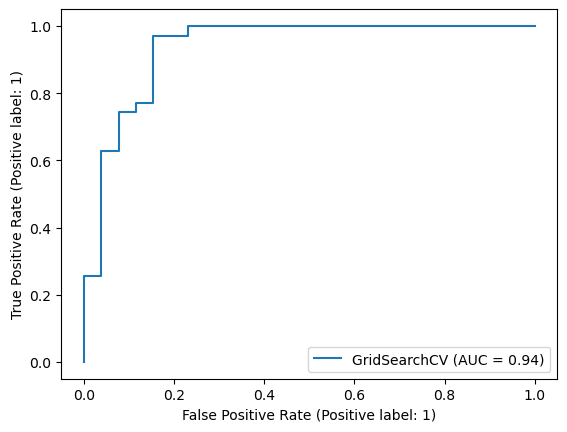

In [242]:
# Plot ROC curve and calculate AUC metric
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test);

In [243]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[22  4]
 [ 2 33]]


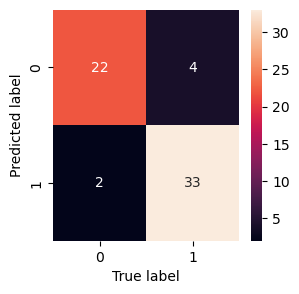

In [244]:
def plot_conf_mat(y_test,y_preds):
    '''
    Plots confusion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True);
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

**Classification report, cross-validated precision, recall, f1-score**

In [245]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.89      0.94      0.92        35

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



**Calculate evaluation metrics using cross validation**

Precision, recall, f1-score, 'cross_val_score()'

In [246]:
# best hyperparameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [247]:
# New classifier with best parameters
clf = LogisticRegression(C=17.433288221999874,solver='liblinear')

In [248]:
#Cross-validated Accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
np.mean(cv_acc)

0.8248633879781421

In [249]:
#Cross-validated Precision
cv_prec = cross_val_score(clf,X,y,cv=5,scoring='precision')
np.mean(cv_prec)

0.8185145372645373

In [250]:
#Cross-validated Recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
np.mean(cv_recall)

0.8787878787878787

In [251]:
#Cross-validated F1-score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
np.mean(cv_f1)

0.8464281258647457

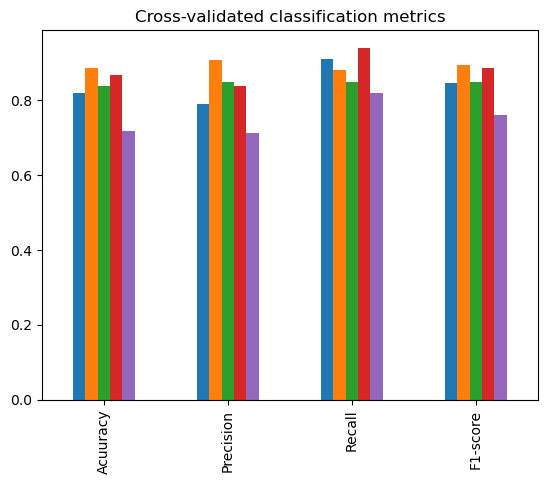

In [252]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Acuuracy":cv_acc,
                          "Precision":cv_prec,
                          "Recall":cv_recall,
                          "F1-score":cv_f1},
                          )

cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                      legend=False);

# ***Feature Importance***

Feature importance is another asking, "which features contributed most to the outcomes of the model and how did they contribute?"



In [253]:
# Fit an instance of logistic regression
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [254]:
res_clf = LogisticRegression(C=17.433288221999874,solver='liblinear')
res_clf.fit(X_train,y_train)

LogisticRegression(C=17.433288221999874, solver='liblinear')

In [255]:
# Check coef_
res_clf.coef_

array([[-0.01302194, -1.6413749 ,  0.74230347, -0.01548188, -0.00659018,
         0.14686066,  0.47583061,  0.02226044, -1.36220273, -0.46451942,
         0.5294661 , -0.67171335, -0.78540189]])

In [256]:
# Match the features to columns
feature_dict = dict(zip(df.columns,list(res_clf.coef_[0])))
feature_dict

{'age': -0.013021941138853495,
 'sex': -1.6413748974243003,
 'cp': 0.7423034726271001,
 'trestbps': -0.015481879178009056,
 'chol': -0.006590180647618614,
 'fbs': 0.14686066226986821,
 'restecg': 0.4758306099834402,
 'thalach': 0.022260442421863442,
 'exang': -1.362202729026892,
 'oldpeak': -0.464519420416995,
 'slope': 0.5294660955645903,
 'ca': -0.6717133465964036,
 'thal': -0.7854018926624983}

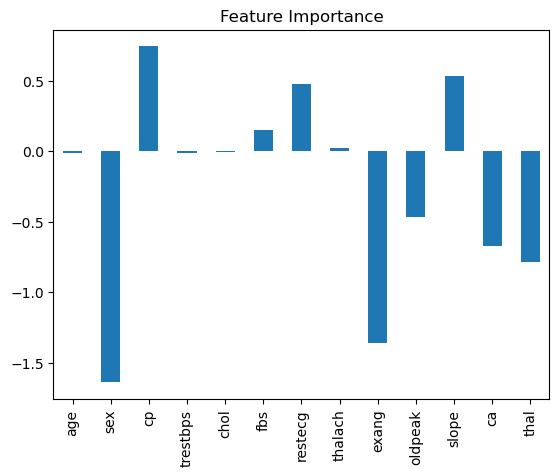

In [257]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False);

In [258]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [259]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [260]:
import pickle
pickle.dump(res_clf,open('heart-disease.pkl','wb'))